<a href="https://www.kaggle.com/code/caueausec/florianopolis-rent-pricing-dataset-eda?scriptVersionId=148281795" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/florianpolis-rent-pricing-dataset/LICENSE
/kaggle/input/florianpolis-rent-pricing-dataset/README.md
/kaggle/input/florianpolis-rent-pricing-dataset/.DS_Store
/kaggle/input/florianpolis-rent-pricing-dataset/changelog.md
/kaggle/input/florianpolis-rent-pricing-dataset/dataset.csv
/kaggle/input/florianpolis-rent-pricing-dataset/code/florianopolis-rent-pricing.ipynb
/kaggle/input/florianpolis-rent-pricing-dataset/code/florianopolis-rent-pricing-dataset-eda.ipynb
/kaggle/input/florianpolis-rent-pricing-dataset/maps/gvw_distritos_administrativos.dbf
/kaggle/input/florianpolis-rent-pricing-dataset/maps/wfsrequest.txt
/kaggle/input/florianpolis-rent-pricing-dataset/maps/gvw_distritos_administrativos.cst
/kaggle/input/florianpolis-rent-pricing-dataset/maps/gvw_distritos_administrativos.shp
/kaggle/input/florianpolis-rent-pricing-dataset/maps/gvw_distritos_administrativos.prj
/kaggle/input/florianpolis-rent-pricing-dataset/maps/gvw_distritos_administrativos.shx
/kaggle/input/floria

### Criando uma função personalizada de análise de medidas descritivas quantitativas

In [2]:
def table_describe(data_att):
    # Medidas de Tendência Central
    ct1 = pd.DataFrame(data_att.apply(np.mean)).T
    ct2 = pd.DataFrame(data_att.apply(np.median)).T


    # Medidas de Dipersão
    d1 = pd.DataFrame(data_att.apply(np.std)).T
    d2 = pd.DataFrame(data_att.apply(min)).T
    d3 = pd.DataFrame(data_att.apply(max)).T
    d4 = pd.DataFrame(data_att.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(data_att.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(data_att.apply(lambda x: x.kurtosis())).T

    # concat
    m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
    m.columns = ['attributes', 'min', 'max', 'amplitude', 'mean', 'median', 'std', 'skew', 'kurtosis']
    round(m,2)
    return m

# Carregar dados para um Dataframe

### Definindo Tipagem de Dados

In [3]:
dtypes = {
          'data': 'datetime64[s]',
          'fonte':'str',
          'descricao': 'str',
          'endereco':'str',
          'rua': 'str',
          'numero': 'float',
          'bairro':'category',
          'cidade': 'category',
          'valor':'float',
          'periodicidade': 'category',
          'condominio': 'float',
          'area':'float',
          'qtd_banheiros': 'float',
          'qtd_quartos':'float',
          'qtd_vagas':'float',
          'url':'str'
          }

In [4]:
# Importando o arquivo do dataset e carregando a tipagem
df = pd.read_csv('/kaggle/input/florianpolis-rent-pricing-dataset/dataset.csv',index_col=0) # Coluna 0 serve como índice
#df = df.astype(dtypes)
df.head()

,data,fonte,descricao,endereco,rua,numero,bairro,cidade,valor,periodicidade,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,url
0,2023-10-27 02:39:38.286047,Viva Real,"Casa com 3 Quartos para Aluguel, 245m²","Rua da Corticeira da Serra, 51 , Cachoeira do ...",Rua da Corticeira da Serra,51.0,Cachoeira do Bom Jesus,florianopolis,2400,Dia,NaN,245,4.0,3.0,NaN,https://vivareal.com.br/imovel/casa-3-quartos-...
1,2023-10-27 02:39:38.290249,Viva Real,"Casa com 4 Quartos para Aluguel, 250m²","Rua das Piraúnas , Jurerê Internacional, Flori...",Rua das Piraúnas,NaN,Jurerê Internacional,florianopolis,2300,Dia,NaN,250,5.0,4.0,2.0,https://vivareal.com.br/imovel/casa-4-quartos-...
2,2023-10-27 02:39:38.295985,Viva Real,"Apartamento com 2 Quartos para Aluguel, 64m²","Pantanal, Florianópolis , SC",Pantanal,NaN,Pantanal,florianopolis,1750,Mês,700.0,64,1.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...
3,2023-10-27 02:39:38.301393,Viva Real,"Apartamento com 2 Quartos para Aluguel, 54m²","Rua das Tainhotas, 133 , Jurerê, Florianópolis...",Rua das Tainhotas,133.0,Jurerê,florianopolis,2900,Mês,600.0,54,1.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...
4,2023-10-27 02:39:38.306747,Viva Real,"Apartamento com 2 Quartos para Aluguel, 95m²","Avenida Madre Benvenuta, 322 , Trindade, Flori...",Avenida Madre Benvenuta,322.0,Trindade,florianopolis,3500,Mês,640.0,95,2.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...


# Observando exemplos de registros:

In [5]:
# df = df.sample(n=999,random_state=443) # Amostra aleatória de 10 registros, reproduzível com a seed 443 no parâmetro 'random_state'.

> Podemos ver que há anúncios mensais e diários, e em ambos os casos o valor de condomínio precisa ser acrescido do valor total, faremos da seguinte forma:

In [6]:
pd.set_option('display.precision', 2) # Definindo a precisão em dígitos com a qual os números float64 serão exibidos.
df['area'] = pd.to_numeric(df['area'].fillna(0))
df['bairro'] = df['bairro'].str.strip()
df['condominio'] = pd.to_numeric(df['condominio'].fillna(0))
df# ['qtd_vagas'] = pd.to_numeric(df['qtd_vagas'].fillna(0))
df# ['qtd_banheiros'] = pd.to_numeric(df['qtd_banheiros'].fillna(0))
df# ['qtd_quartos'] = pd.to_numeric(df['qtd_quartos'].fillna(0))
df

,data,fonte,descricao,endereco,rua,numero,bairro,cidade,valor,periodicidade,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,url
0,2023-10-27 02:39:38.286047,Viva Real,"Casa com 3 Quartos para Aluguel, 245m²","Rua da Corticeira da Serra, 51 , Cachoeira do ...",Rua da Corticeira da Serra,51.0,Cachoeira do Bom Jesus,florianopolis,2400,Dia,0.0,245,4.0,3.0,NaN,https://vivareal.com.br/imovel/casa-3-quartos-...
1,2023-10-27 02:39:38.290249,Viva Real,"Casa com 4 Quartos para Aluguel, 250m²","Rua das Piraúnas , Jurerê Internacional, Flori...",Rua das Piraúnas,NaN,Jurerê Internacional,florianopolis,2300,Dia,0.0,250,5.0,4.0,2.0,https://vivareal.com.br/imovel/casa-4-quartos-...
2,2023-10-27 02:39:38.295985,Viva Real,"Apartamento com 2 Quartos para Aluguel, 64m²","Pantanal, Florianópolis , SC",Pantanal,NaN,Pantanal,florianopolis,1750,Mês,700.0,64,1.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...
3,2023-10-27 02:39:38.301393,Viva Real,"Apartamento com 2 Quartos para Aluguel, 54m²","Rua das Tainhotas, 133 , Jurerê, Florianópolis...",Rua das Tainhotas,133.0,Jurerê,florianopolis,2900,Mês,600.0,54,1.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...
4,2023-10-27 02:39:38.306747,Viva Real,"Apartamento com 2 Quartos para Aluguel, 95m²","Avenida Madre Benvenuta, 322 , Trindade, Flori...",Avenida Madre Benvenuta,322.0,Trindade,florianopolis,3500,Mês,640.0,95,2.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...
5,2023-10-27 02:39:38.312162,Viva Real,"Sala/Conjunto para Aluguel, 18m²","Rua Felipe Schmidt , Centro, Florianópolis , SC",Rua Felipe Schmidt,NaN,Centro,florianopolis,480,Mês,0.0,18,1.0,NaN,NaN,https://vivareal.com.br/imovel/sala-comercial-...
6,2023-10-27 02:39:38.317538,Viva Real,"Apartamento com Quarto para Aluguel, 68m²","Rua Capitão Américo, 96 , Córrego Grande, Flor...",Rua Capitão Américo,96.0,Córrego Grande,florianopolis,3500,Mês,430.0,68,2.0,1.0,2.0,https://vivareal.com.br/imovel/apartamento-1-q...
7,2023-10-27 02:39:38.322764,Viva Real,"Apartamento com Quarto para Aluguel, 45m²","Rua João Carlos de Menezes, 173 , Campeche, Fl...",Rua João Carlos de Menezes,173.0,Campeche,florianopolis,3650,Mês,1.0,45,1.0,1.0,2.0,https://vivareal.com.br/imovel/apartamento-1-q...
8,2023-10-27 02:39:38.328040,Viva Real,"Ponto comercial/Loja/Box para Aluguel, 90m²","Rua Fúlvio Aducci, 971 , Estreito, Florianópol...",Rua Fúlvio Aducci,971.0,Estreito,florianopolis,2500,Mês,0.0,90,2.0,NaN,NaN,https://vivareal.com.br/imovel/ponto-comercial...
9,2023-10-27 02:39:38.332862,Viva Real,"Apartamento com Quarto para Aluguel, 35m²","Rua Maria Eduarda, 238 , Pantanal, Florianópol...",Rua Maria Eduarda,238.0,Pantanal,florianopolis,2950,Mês,610.0,35,1.0,1.0,NaN,https://vivareal.com.br/imovel/apartamento-1-q...


### Para os contratos mensais, vamos adicionar o valor do aluguel ao condomínio para obtermos o valor total

In [7]:
df['valor_total'] = pd.to_numeric(df.apply(lambda row: row['valor'] + row['condominio'] if not pd.isnull(row['valor']) and not pd.isnull(row['condominio']) else row['valor'], axis=1).fillna(0))

# Avaliando os tipos e consistência das colunas

In [8]:
#Informações sobre as colunas do dataframe:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data           51 non-null     object 
 1   fonte          51 non-null     object 
 2   descricao      51 non-null     object 
 3   endereco       51 non-null     object 
 4   rua            51 non-null     object 
 5   numero         22 non-null     float64
 6   bairro         51 non-null     object 
 7   cidade         51 non-null     object 
 8   valor          51 non-null     int64  
 9   periodicidade  51 non-null     object 
 10  condominio     51 non-null     float64
 11  area           51 non-null     int64  
 12  qtd_banheiros  49 non-null     float64
 13  qtd_quartos    43 non-null     float64
 14  qtd_vagas      38 non-null     float64
 15  url            51 non-null     object 
 16  valor_total    51 non-null     float64
dtypes: float64(6), int64(2), object(9)
memory usage: 7.2+ KB


In [9]:
# Extraíndo medidas descritivas de variáveis quantitativas pelo pandas
df.describe()

,numero,valor,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,valor_total
count,22.00,51.00,51.00,51.00,49.00,43.00,38.00,51.00
mean,1027.59,2852.16,250.32,85.43,1.63,2.21,1.39,3102.47
std,1584.83,1258.02,282.28,59.23,0.91,1.06,0.64,1371.95
min,32.00,480.00,0.00,18.00,1.00,1.00,1.00,480.00
25%,123.25,1725.00,0.00,41.00,1.00,1.00,1.00,1975.00
50%,329.00,2900.00,44.00,68.00,1.00,2.00,1.00,3334.00
75%,965.00,3600.00,502.00,97.00,2.00,3.00,2.00,4041.00
max,6055.00,5500.00,800.00,250.00,5.00,5.00,4.00,6000.00


In [10]:
# Extraíndo medidas descritivas de variáveis quantitativas pela função personalizada
table_describe(df[['numero','valor','valor_total','area','qtd_quartos','qtd_banheiros','qtd_vagas']])

,attributes,min,max,amplitude,mean,median,std,skew,kurtosis
0,numero,32.0,6055.0,6023.0,1027.59,NaN,1548.39,2.28,4.92
1,valor,480.0,5500.0,5020.0,2852.16,2900.0,1245.63,0.17,-0.52
2,valor_total,480.0,6000.0,5520.0,3102.47,3334.0,1358.43,0.03,-0.64
3,area,18.0,250.0,232.0,85.43,68.0,58.64,1.57,1.77
4,qtd_quartos,1.0,5.0,4.0,2.21,NaN,1.05,0.82,0.52
5,qtd_banheiros,1.0,5.0,4.0,1.63,NaN,0.90,1.69,3.19
6,qtd_vagas,NaN,NaN,3.0,1.39,NaN,0.63,2.06,5.98


### Visualizando distribuição de variaveis quantitativas

In [11]:
# Instalando a biblioteca de visualização em raincloud plots
!pip install ptitprince

  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 11.0 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10662 sha256=4351f5fc5773cce05313d164ce784d914575a4aef5b842c0babc6c0b451c2193
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.2 which is incompatible.


In [12]:
import plotly.express as px
import matplotlib.pyplot as plt
import ptitprince as pt

In [13]:
df_rainclouds = df[['valor_total','valor','condominio','area','periodicidade']]

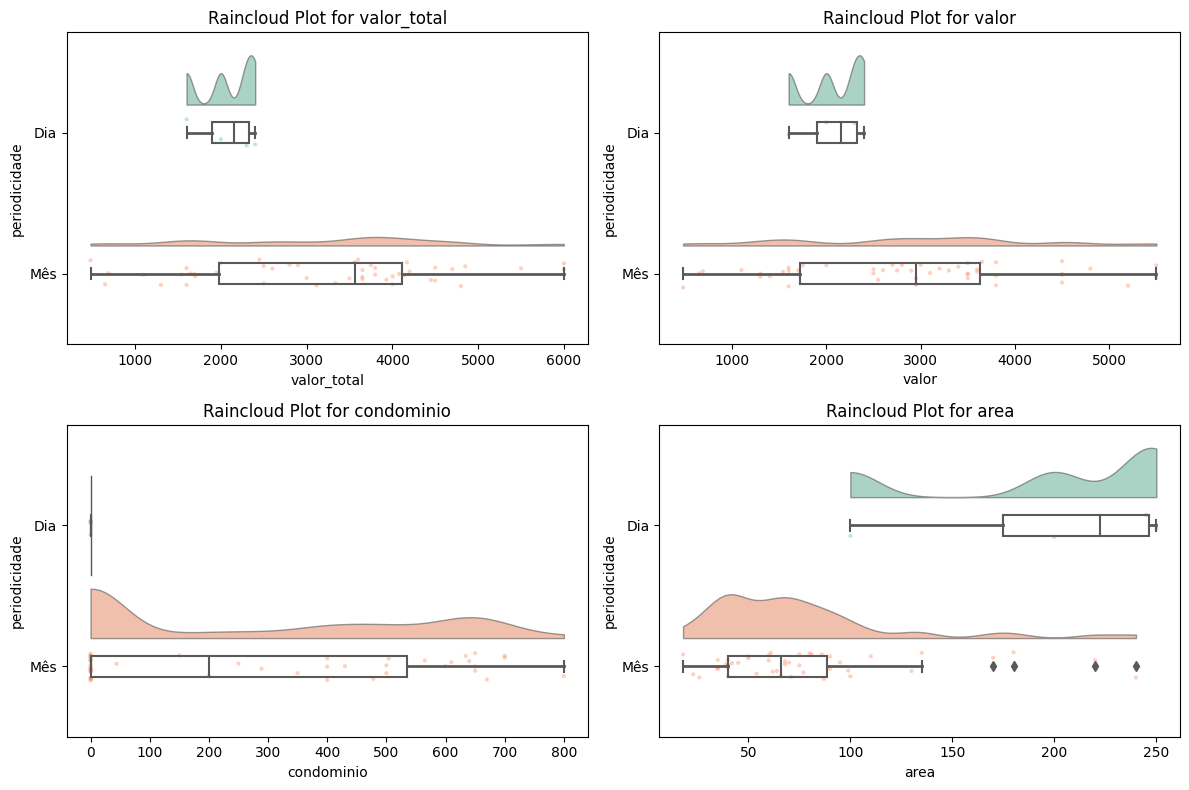

In [14]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Loop through the axes and plot the raincloud plots
for i, col in enumerate(df_rainclouds.columns[:4]):
    pt.RainCloud(x='periodicidade', y=col, data=df_rainclouds, ax=axes[i // 2, i % 2], palette='Set2', orient='h', alpha=0.6, edgecolor='black', rain_alpha=0.4)
    axes[i // 2, i % 2].set_title(f'Raincloud Plot for {col}')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Calculando correlação de variáveis quantitativas

In [15]:
# Estimando correlação de variaveis quantitativas
df_corr = df[[
            'valor',
            'condominio',
            'area',
            'qtd_banheiros',
            'qtd_quartos',
            'qtd_vagas',
            'valor_total'
            ]]
corr_matrix = df_corr.corr()
corr_matrix

,valor,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,valor_total
valor,1.00,0.31,0.40,0.27,0.25,0.31,0.98
condominio,0.31,1.00,-0.18,-0.05,-0.24,-0.25,0.49
area,0.40,-0.18,1.00,0.75,0.65,0.62,0.33
qtd_banheiros,0.27,-0.05,0.75,1.00,0.40,0.49,0.24
qtd_quartos,0.25,-0.24,0.65,0.40,1.00,0.33,0.18
qtd_vagas,0.31,-0.25,0.62,0.49,0.33,1.00,0.23
valor_total,0.98,0.49,0.33,0.24,0.18,0.23,1.00


In [16]:
# Importando o matplotlib com o pyplot para a criação de subplots
import matplotlib.pyplot as plt

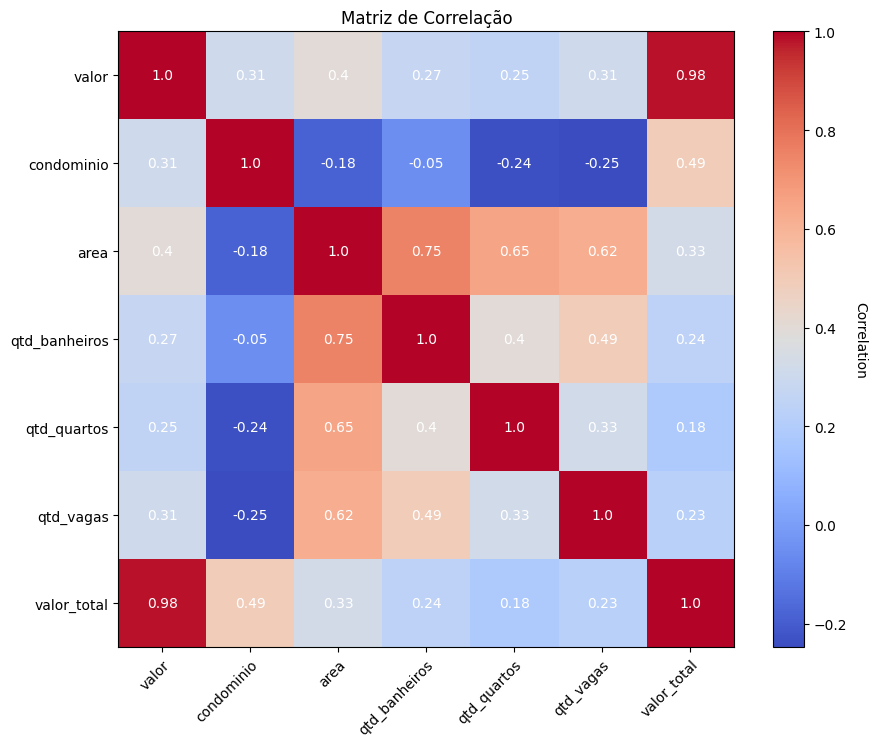

In [17]:
# Criando os subplots
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr_matrix, cmap='coolwarm')

# adicionando os valores de correlação aos subplots
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2), ha="center", va="center", color="w")

# Setando os ticks e labels
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

# rotacionando labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Adicionando título
ax.set_title("Matriz de Correlação")

# Adicionando a legenda de cores
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom")\

plt.show()

# Calculando Distribuição das variáveis qualitativas

In [18]:
# Listando todas as variáveis
columns = df.columns
columns

Index(['data', 'fonte', 'descricao', 'endereco', 'rua', 'numero', 'bairro',
       'cidade', 'valor', 'periodicidade', 'condominio', 'area',
       'qtd_banheiros', 'qtd_quartos', 'qtd_vagas', 'url', 'valor_total'],
      dtype='object')

In [19]:
# Preparando os dados:
df_bairro = pd.DataFrame(df['bairro'].value_counts()).reset_index().head(8)
df_periodicidade = pd.DataFrame(df['periodicidade'].value_counts()).reset_index()

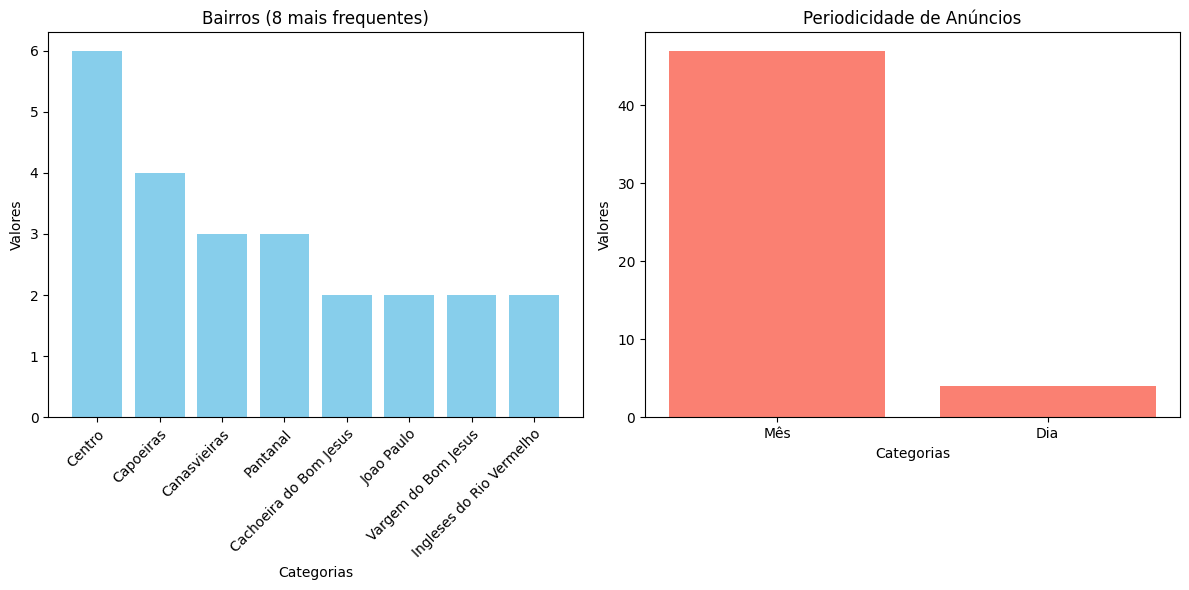

In [20]:
# Criar a figura e os eixos dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotar o primeiro gráfico de barras
ax1.bar(df_bairro['bairro'], df_bairro['count'], color='skyblue')
ax1.set_title('Bairros (8 mais frequentes)')
ax1.set_xlabel('Categorias')
ax1.set_ylabel('Valores')
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Plotar o segundo gráfico de barras
ax2.bar(df_periodicidade['periodicidade'], df_periodicidade['count'], color='salmon')
ax2.set_title('Periodicidade de Anúncios')
ax2.set_xlabel('Categorias')
ax2.set_ylabel('Valores')

# Ajustar o layout
plt.tight_layout()

# Mostrar o plot
plt.show()

# Correlação de Variáveis:

### Area vs. Valor:

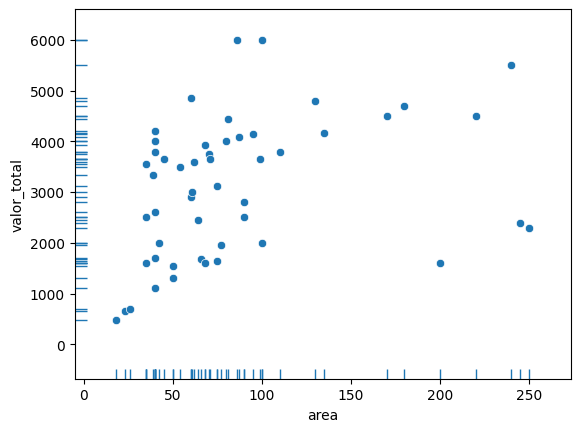

In [21]:
import seaborn as sns

sns.scatterplot(data=df, x="area", y="valor_total")
sns.rugplot(data=df, x="area", y="valor_total")

plt.show()

# Visualização geográfica dos valores (em construção):

## Preparação do mapa por bairros

In [22]:
# Importando o módulo Geopandas
import geopandas as gpd

In [23]:
# Carregando o arquivo shp
forma = "/kaggle/input/florianpolis-rent-pricing-dataset/maps/gvw_distritos_administrativos.shp" 
map_df = gpd.read_file(forma)

# Checando as primeiras linhas do Dataframe
map_df.head()

,id,nome,codigo_ibg,geometry
0,14,SACO DOS LIMÕES,NaN,"POLYGON ((744781.046 6942893.295, 744786.120 6..."
1,15,TAPERA DA BASE,NaN,"POLYGON ((744824.192 6938017.624, 744824.816 6..."
2,16,CAMPECHE,NaN,"POLYGON ((744668.971 6939448.286, 744675.081 6..."
3,17,LAGOA DA CONCEIÇÃO,NaN,"POLYGON ((749776.108 6951257.235, 749917.278 6..."
4,18,COQUEIROS,NaN,"POLYGON ((736331.464 6944691.410, 736352.575 6..."


<Axes: >

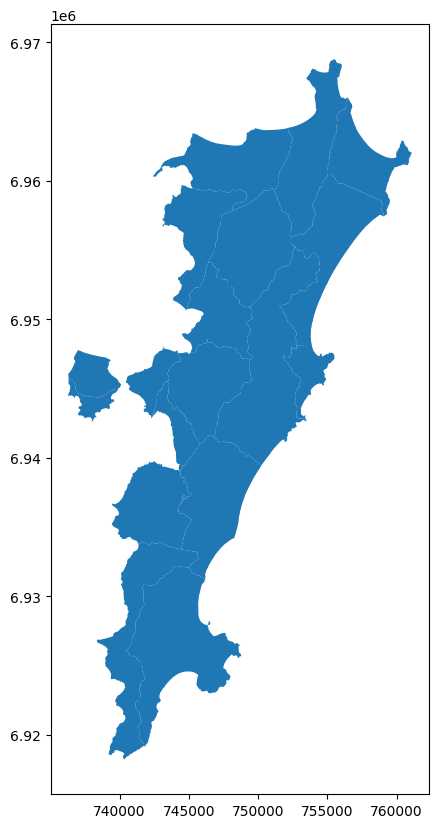

In [24]:
# Visualizando o mapa com o Matplotlib
fig,ax = plt.subplots(figsize=(10,10))
map_df.plot(ax=ax)

In [25]:
# Formatando a coluna de nome dos bairros
map_df['nome'] = map_df['nome'].str.title()
map_df.head(50)

,id,nome,codigo_ibg,geometry
0,14,Saco Dos Limões,NaN,"POLYGON ((744781.046 6942893.295, 744786.120 6..."
1,15,Tapera Da Base,NaN,"POLYGON ((744824.192 6938017.624, 744824.816 6..."
2,16,Campeche,NaN,"POLYGON ((744668.971 6939448.286, 744675.081 6..."
3,17,Lagoa Da Conceição,NaN,"POLYGON ((749776.108 6951257.235, 749917.278 6..."
4,18,Coqueiros,NaN,"POLYGON ((736331.464 6944691.410, 736352.575 6..."
5,19,Barra Da Lagoa,NaN,"POLYGON ((752757.264 6943113.054, 752760.569 6..."
6,20,Ribeirão Da Ilha,NaN,"POLYGON ((741474.143 6920249.649, 741480.396 6..."
7,21,Saco Grande,NaN,"POLYGON ((746210.517 6953416.500, 746235.956 6..."
8,22,Sede,NaN,"POLYGON ((742410.177 6943145.230, 742408.774 6..."
9,23,Canasvieiras,NaN,"POLYGON ((745243.145 6959489.353, 745265.512 6..."


## Preparando os dados do dataset a serem medidos

In [26]:
# Conciliando nomes de colunas com o dataset de mapas
df_mean = df[df['periodicidade']=='Mês'].copy()
df_mean['bairro'] = df_mean['bairro'].str.strip().str.title()
df_mean['bairro'] = df_mean['bairro'].str.replace('Ingleses Do Rio Vermelho','Ingleses')
df_mean['bairro'] = df_mean['bairro'].str.replace('Ingleses Norte','Ingleses')
df_mean['bairro'] = df_mean['bairro'].str.replace('São João Do Rio Vermelho','Rio Vermelho')
df_mean['bairro'] = df_mean['bairro'].str.replace('Centro','Sede')
df_mean['bairro'] = df_mean['bairro'].str.replace('Canto Da Lagoa','Lagoa Da Conceição')
df_mean

,data,fonte,descricao,endereco,rua,numero,bairro,cidade,valor,periodicidade,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,url,valor_total
2,2023-10-27 02:39:38.295985,Viva Real,"Apartamento com 2 Quartos para Aluguel, 64m²","Pantanal, Florianópolis , SC",Pantanal,NaN,Pantanal,florianopolis,1750,Mês,700.0,64,1.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...,2450.0
3,2023-10-27 02:39:38.301393,Viva Real,"Apartamento com 2 Quartos para Aluguel, 54m²","Rua das Tainhotas, 133 , Jurerê, Florianópolis...",Rua das Tainhotas,133.0,Jurerê,florianopolis,2900,Mês,600.0,54,1.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...,3500.0
4,2023-10-27 02:39:38.306747,Viva Real,"Apartamento com 2 Quartos para Aluguel, 95m²","Avenida Madre Benvenuta, 322 , Trindade, Flori...",Avenida Madre Benvenuta,322.0,Trindade,florianopolis,3500,Mês,640.0,95,2.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...,4140.0
5,2023-10-27 02:39:38.312162,Viva Real,"Sala/Conjunto para Aluguel, 18m²","Rua Felipe Schmidt , Centro, Florianópolis , SC",Rua Felipe Schmidt,NaN,Sede,florianopolis,480,Mês,0.0,18,1.0,NaN,NaN,https://vivareal.com.br/imovel/sala-comercial-...,480.0
6,2023-10-27 02:39:38.317538,Viva Real,"Apartamento com Quarto para Aluguel, 68m²","Rua Capitão Américo, 96 , Córrego Grande, Flor...",Rua Capitão Américo,96.0,Córrego Grande,florianopolis,3500,Mês,430.0,68,2.0,1.0,2.0,https://vivareal.com.br/imovel/apartamento-1-q...,3930.0
7,2023-10-27 02:39:38.322764,Viva Real,"Apartamento com Quarto para Aluguel, 45m²","Rua João Carlos de Menezes, 173 , Campeche, Fl...",Rua João Carlos de Menezes,173.0,Campeche,florianopolis,3650,Mês,1.0,45,1.0,1.0,2.0,https://vivareal.com.br/imovel/apartamento-1-q...,3651.0
8,2023-10-27 02:39:38.328040,Viva Real,"Ponto comercial/Loja/Box para Aluguel, 90m²","Rua Fúlvio Aducci, 971 , Estreito, Florianópol...",Rua Fúlvio Aducci,971.0,Estreito,florianopolis,2500,Mês,0.0,90,2.0,NaN,NaN,https://vivareal.com.br/imovel/ponto-comercial...,2500.0
9,2023-10-27 02:39:38.332862,Viva Real,"Apartamento com Quarto para Aluguel, 35m²","Rua Maria Eduarda, 238 , Pantanal, Florianópol...",Rua Maria Eduarda,238.0,Pantanal,florianopolis,2950,Mês,610.0,35,1.0,1.0,NaN,https://vivareal.com.br/imovel/apartamento-1-q...,3560.0
11,2023-10-27 02:39:38.343528,Viva Real,"Apartamento com Quarto para Aluguel, 40m²","Agronômica, Florianópolis , SC",Agronômica,NaN,Agronômica,florianopolis,3600,Mês,400.0,40,1.0,1.0,1.0,https://vivareal.com.br/imovel/apartamento-1-q...,4000.0
12,2023-10-27 02:39:38.348378,Viva Real,"Apartamento com 2 Quartos para Aluguel, 135m²","Canto, Florianópolis , SC",Canto,NaN,Canto,florianopolis,3500,Mês,670.0,135,2.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...,4170.0


In [27]:
# Sumarizando valores por bairro
df_mean = df_mean.groupby('bairro')['valor_total'].count()
df_mean = pd.DataFrame(df_mean).reset_index()
df_mean = df_mean.sort_values(by='bairro')

## Relacionando DF de mapas com DF de valores sumarizados

In [28]:
merged_gdf = map_df.merge(df_mean, left_on='nome', right_on='bairro', how='left')
merged_gdf = merged_gdf.sort_values(by='nome')
merged_gdf['valor_total'] = merged_gdf['valor_total'].fillna(0)
merged_gdf

,id,nome,codigo_ibg,geometry,bairro,valor_total
5,19,Barra Da Lagoa,NaN,"POLYGON ((752757.264 6943113.054, 752760.569 6...",NaN,0.0
15,29,Cachoeira Do Bom Jesus,NaN,"POLYGON ((751151.067 6959322.001, 751151.143 6...",Cachoeira Do Bom Jesus,1.0
2,16,Campeche,NaN,"POLYGON ((744668.971 6939448.286, 744675.081 6...",Campeche,2.0
9,23,Canasvieiras,NaN,"POLYGON ((745243.145 6959489.353, 745265.512 6...",Canasvieiras,1.0
4,18,Coqueiros,NaN,"POLYGON ((736331.464 6944691.410, 736352.575 6...",NaN,0.0
16,30,Estreito,NaN,"POLYGON ((737856.426 6944431.099, 737849.727 6...",Estreito,2.0
11,25,Ingleses,NaN,"POLYGON ((755042.558 6960493.181, 755043.887 6...",Ingleses,3.0
3,17,Lagoa Da Conceição,NaN,"POLYGON ((749776.108 6951257.235, 749917.278 6...",Lagoa Da Conceição,2.0
14,28,Pântano Do Sul,NaN,"POLYGON ((741825.954 6924129.445, 741838.840 6...",NaN,0.0
10,24,Ratones,NaN,"POLYGON ((746945.937 6953709.978, 746934.416 6...",NaN,0.0


## Gerando visualização

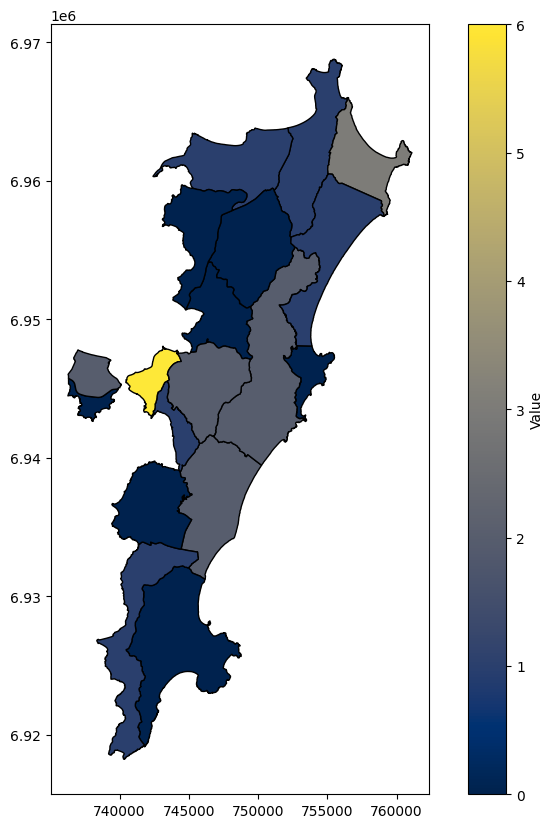

In [29]:
fig,ax = plt.subplots(figsize=(10,10))
merged_gdf.plot(
    ax=ax,
    column='valor_total',
    cmap='cividis',
    legend=True,
    legend_kwds={'label': "Value"},
    markersize=100,
    edgecolor='k')
plt.show()